# Examples taken from Cubical complexes tutorial
Tutorial link:
- https://arxiv.org/pdf/1807.08607.pdf

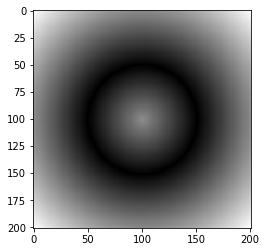

In [21]:
#This experiemnt has been designed by Pawel Dlotko, p.t.dlotko@swansea.ac.uk
#It is distributed under GPLv3 licence

import numpy as np
import math
import gudhi as gd
from matplotlib import pyplot as plt

N = 100
array = np.zeros((2*N+1,2*N+1))
xExtrem = 2;
yExtrem = 2;

bitmap = []
for i in range(0,2*N+1):
	for j in range (0,2*N+1):
		x = i/(2*float(N)+1)*2*float(xExtrem)-xExtrem
		y = j/(2*float(N)+1)*2*float(xExtrem)-xExtrem
		norm = math.sqrt( x*x + y*y )
		norm =  math.fabs(norm-1)
		array[i][j] = norm
		bitmap.append(norm)


#Here we will display our creation:
plt.imshow(array, cmap='gray', interpolation='nearest', vmin=np.amin(array), vmax=np.amax(array))
#plt.savefig('circle.png')
plt.show()

In [24]:
bitmap

[1.8284271247461903,
 1.8143905272281406,
 1.800424992586923,
 1.7865315892811853,
 1.7727114016105023,
 1.7589655298285818,
 1.7452950902491748,
 1.7317012153441356,
 1.7181850538330745,
 1.7047477707640106,
 1.6913905475844158,
 1.6781145822020171,
 1.6649210890347037,
 1.6518112990488643,
 1.6387864597854485,
 1.6258478353730448,
 1.6129967065272148,
 1.6002343705353415,
 1.5875621412261895,
 1.5749813489233828,
 1.562493340381979,
 1.5500994787072888,
 1.5378011432550944,
 1.525599729512384,
 1.5134966489577173,
 1.5014933289003207,
 1.4895912122969963,
 1.4777917575459263,
 1.4660964382564439,
 1.454506742993833,
 1.4430241749982238,
 1.431650251876654,
 1.420386505267356,
 1.4092344804753516,
 1.3981957360784456,
 1.3872718435027087,
 1.3764643865665844,
 1.3657749609927494,
 1.3552051738869135,
 1.3447566431827442,
 1.3344309970521766,
 1.3242298732803763,
 1.3141549186046935,
 1.304207788016992,
 1.2943901440288026,
 1.2847036558988005,
 1.2751499988222017,
 1.2657308530817315,

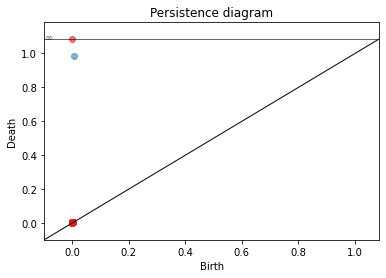

In [25]:
#Given the input data we can buld a Gudhi btmap cubical complex:
bcc = gd.CubicalComplex(top_dimensional_cells = bitmap, dimensions=[2*N+1,2*N+1])
#optional computation of persistence
persistence = bcc.persistence()
plt = gd.plot_persistence_diagram(persistence)
# plt.show()

## gudhi_graphical_tools_example.py

https://github.com/GUDHI/gudhi-devel/blob/master/src/python/example/gudhi_graphical_tools_example.py

#####################################################################
Show barcode persistence example


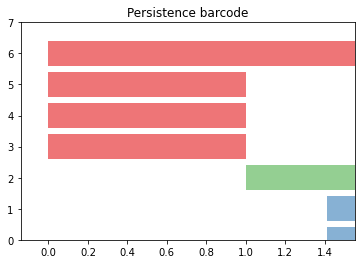

#####################################################################
Show diagram persistence example


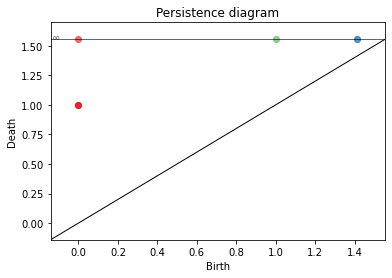

#####################################################################
Show diagram persistence example with a confidence band


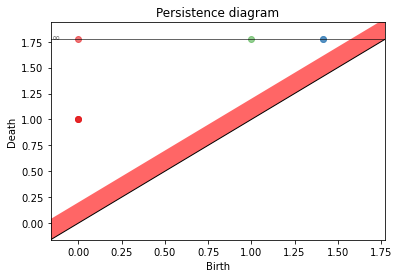

#####################################################################
Show barcode and diagram persistence side by side example


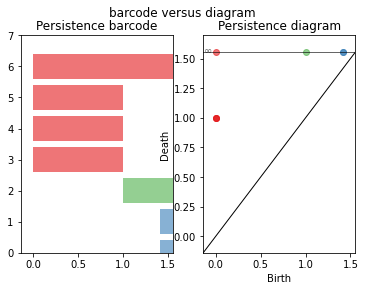

In [7]:
import matplotlib.pyplot as plot
import gudhi

""" This file is part of the Gudhi Library - https://gudhi.inria.fr/ - which is released under MIT.
    See file LICENSE or go to https://gudhi.inria.fr/licensing/ for full license details.
    Author(s):       Vincent Rouvreau

    Copyright (C) 2016 Inria

    Modification(s):
      - YYYY/MM Author: Description of the modification
"""

__author__ = "Vincent Rouvreau"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "MIT"

print("#####################################################################")
print("Show barcode persistence example")

persistence = [
    (2, (1.0, float("inf"))),
    (1, (1.4142135623730951, float("inf"))),
    (1, (1.4142135623730951, float("inf"))),
    (0, (0.0, float("inf"))),
    (0, (0.0, 1.0)),
    (0, (0.0, 1.0)),
    (0, (0.0, 1.0)),
]
gudhi.plot_persistence_barcode(persistence)
plot.show()

print("#####################################################################")
print("Show diagram persistence example")

gudhi.plot_persistence_diagram(persistence)
plot.show()

print("#####################################################################")
print("Show diagram persistence example with a confidence band")

gudhi.plot_persistence_diagram(persistence, band=0.2)
plot.show()

print("#####################################################################")
print("Show barcode and diagram persistence side by side example")
fig, axes = plot.subplots(nrows=1, ncols=2)
gudhi.plot_persistence_barcode(persistence, axes = axes[0])
gudhi.plot_persistence_diagram(persistence, axes = axes[1])
fig.suptitle("barcode versus diagram")
plot.show()


# random_cubical_complex_persistence_example
https://github.com/GUDHI/gudhi-devel/blob/master/src/python/example/random_cubical_complex_persistence_example.py

In [14]:
import gudhi
import numpy
from functools import reduce
import argparse
import operator


""" This file is part of the Gudhi Library - https://gudhi.inria.fr/ - which is released under MIT.
    See file LICENSE or go to https://gudhi.inria.fr/licensing/ for full license details.
    Author(s):       Vincent Rouvreau

    Copyright (C) 2016 Inria

    Modification(s):
      - YYYY/MM Author: Description of the modification
"""

__author__ = "Vincent Rouvreau"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "MIT"

parser = argparse.ArgumentParser(
    description="Random cubical complex.",
    epilog="Example: "
    "./random_cubical_complex_persistence_example.py"
    " 10 10 10 - Constructs a random cubical "
    "complex in a dimension [10, 10, 10] (aka. "
    "1000 random top dimensional cells).",
)
parser.add_argument("dimension", type=int, nargs="*", help="Cubical complex dimensions")

args = parser.parse_args()
dimension_multiplication = reduce(operator.mul, args.dimension, 1)

if dimension_multiplication > 1:
    print("#####################################################################")
    print("CubicalComplex creation")
    cubical_complex = gudhi.CubicalComplex(
        dimensions=args.dimension,
        top_dimensional_cells=numpy.random.rand(dimension_multiplication),
    )

    print("persistence(homology_coeff_field=2, min_persistence=0)=")
    print(cubical_complex.persistence(homology_coeff_field=2, min_persistence=0))

    print("betti_numbers()=")
    print(cubical_complex.betti_numbers())


usage: ipykernel_launcher.py [-h] [dimension [dimension ...]]
ipykernel_launcher.py: error: argument dimension: invalid int value: '/Users/emil/Library/Jupyter/runtime/kernel-52baab18-a7f4-4f73-9e89-c1880dcdba2f.json'
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/emil/anaconda3/envs/gudhi/lib/python3.8/argparse.py", line 2422, in _get_value
    result = type_func(arg_string)
ValueError: invalid literal for int() with base 10: '/Users/emil/Library/Jupyter/runtime/kernel-52baab18-a7f4-4f73-9e89-c1880dcdba2f.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/emil/anaconda3/envs/gudhi/lib/python3.8/argparse.py", line 1800, in parse_known_args
    namespace, args = self._parse_known_args(args, namespace)
  File "/Users/emil/anaconda3/envs/gudhi/lib/python3.8/argparse.py", line 2009, in _parse_known_args
    stop_index = consume_positionals(start_index)
  File "/Users/emil/anaconda3/envs/gudhi/lib/python3.8/argparse.py", line 1965, in consume_positionals
    take_action(action, args)
  File "/Users/emil/anaconda3/envs/gudhi/lib/python3.8/argparse.py", line 1858, in take_action
    argument_values = self._get_values(action, argu

TypeError: can only concatenate str (not "list") to str

## periodic_cubical_complex_barcode_persistence_from_perseus_file_example.py

https://github.com/GUDHI/gudhi-devel/blob/master/src/python/example/periodic_cubical_complex_barcode_persistence_from_perseus_file_example.py

In [13]:
#!/usr/bin/env python

import argparse
import matplotlib.pyplot as plot
import errno
import os
import gudhi

""" This file is part of the Gudhi Library - https://gudhi.inria.fr/ -
    which is released under MIT.
    See file LICENSE or go to https://gudhi.inria.fr/licensing/ for full
    license details.
    Author(s):       Vincent Rouvreau

    Copyright (C) 2016 Inria

    Modification(s):
      - YYYY/MM Author: Description of the modification
"""

__author__ = "Vincent Rouvreau"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "MIT"


def is_file_perseus(file):
    num_lines = open(file).read().count("\n")
    try:
        f = open(file)
        num_dim = int(f.readline())
        coeff = 1
        for dim in range(0, num_dim):
            try:
                line = int(f.readline())
                coeff *= abs(line)
            except ValueError:
                return False
        if num_lines == (1 + num_dim + coeff):
            return True
        else:
            return False
    except ValueError:
        return False


parser = argparse.ArgumentParser(
    description="Periodic cubical complex from a " "Perseus-style file name.",
    epilog="Example: "
    "./periodic_cubical_complex_barcode_persistence_from_perseus_file_example.py"
#     " -f ../data/bitmap/CubicalTwoSphere.txt",
    " -f ~/Downloads/code/cubical_complexes/CubicalTwoSphere.txt",
)

parser.add_argument("-f", "--file", type=str, required=True)
parser.add_argument(
    "--no-barcode",
    default=False,
    action="store_true",
    help="Flag for not to display the barcodes",
)

args = parser.parse_args()

args.file = "Users/emil/Downloads/code/cubical_complexes/CubicalTwoSphere.txt"

if is_file_perseus(args.file):
    print("##################################################################")
    print("PeriodicCubicalComplex creation")
    periodic_cubical_complex = gudhi.PeriodicCubicalComplex(
        perseus_file=args.file)

    print("persistence(homology_coeff_field=3, min_persistence=0)=")
    diag = periodic_cubical_complex.persistence(
        homology_coeff_field=3, min_persistence=0
    )
    print(diag)

    print("betti_numbers()=")
    print(periodic_cubical_complex.betti_numbers())
    if args.no_barcode == False:
        gudhi.plot_persistence_barcode(diag)
        plot.show()
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT),
                            args.file)


FileNotFoundError: [Errno 2] No such file or directory: 'Users/emil/Downloads/code/cubical_complexes/CubicalTwoSphere.txt'